### Feature Engineering

In [ ]:
#Copy data
df_fet = df.copy()

In [ ]:
# Check Marital Status

df_fet["Marital_Status"].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

**Detail** : Kolom **Marital_Status** memiliki beberapa value yang dapat disederhanakan

In [ ]:
# Check Education

df_fet["Education"].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [ ]:
# Merapikan kolom Marital_Status
df_fet["Marital_Status"] = df_fet["Marital_Status"].replace({"Together": "Married","Alone": "Single", "Absurd": "Single", 
                                                     "Divorced": "Single", "Widow": "Single", "Divorced": "Single", 
                                                     "YOLO": "Single"})
# Merapikan kolom Education
df_fet["Education"] = df_fet["Education"].replace({"2n Cycle": "Master"})

# Menambahkan kolom Age
df_fet["Age"] = 2015 - df["Year_Birth"]                                                 

# Menggabungkan kolom Kidhome dan Teenhome
df_fet["Children"] = df["Kidhome"] + df["Teenhome"]

# Menggabungkan jumlah pembelian (Quantity)
df_fet["Total_Amount"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]

# Menggabungkan pembelian semua platform (Frekuensi)
df_fet["Total_Purchase"] = df["NumWebPurchases"] + df["NumCatalogPurchases"] + df["NumStorePurchases"]

df_fet.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation        Married  71613.0        0         0   
3  6182        1984  Graduation        Married  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  Age  Children  Total_Amount  \
0              3         11         1   58         0          1617   
1              3         11         0   61         2            27   
2              3         11         0   50         0           776   
3              3         11         0   31         1            53   
4              3         11         0   34         1           422   

   Total_Purchase  
0              22  
1               4  
2              20  
3               6  
4              14

**Detail** : 

- Kolom **Marital Status** disederhanakan menjadi dua kelompok, apakah pengguna tersebut memiliki pasangan (Married) atau tidak (Single)
- Pada kolom **Education** 2n Cycle diubah menjadi Master karena memiliki makna dan tingkatan yang sama
- Menambahkan kolom **Age** dengan mengurangkan tahun dimana data ini diambil (2015) dengan kolom **Year_Birth**
- Kolom **Kidhome** dan **Teenhome** digabungkan menjadi kolom **Children**
- Menggabungkan beberapa kolom jumlah pembelian produk untuk dapat melihat total jumlah pembelian seluruh produk (**Total_Amount**)
- Menambahkan kolom **Total_Purchase** dengan menambahkan frekuensi pembelian dari masing-masing platform (**NumWebPurchases**,  **NumCatalogPurchases**,  **NumStorePurchases**)

In [ ]:
# Check new Marital Status

df_fet["Marital_Status"].value_counts()

Married    1444
Single      796
Name: Marital_Status, dtype: int64

In [ ]:
# Check new Education

df_fet["Education"].value_counts()

Graduation    1127
Master         573
PhD            486
Basic           54
Name: Education, dtype: int64

In [ ]:
# Check Z_CostContract

df_fet["Z_CostContact"].value_counts()

3    2240
Name: Z_CostContact, dtype: int64

In [ ]:
# Check Z_Revenue

df_fet["Z_Revenue"].value_counts()

11    2240
Name: Z_Revenue, dtype: int64

In [ ]:
# Menghapus kolom yang tidak diperlukan

df_fet.drop(["ID", "Year_Birth", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Kidhome", "Teenhome"], axis=1, inplace=True)
df_fet.head()

Education Marital_Status   Income  Recency  MntWines  MntFruits  \
0  Graduation         Single  58138.0       58       635         88   
1  Graduation         Single  46344.0       38        11          1   
2  Graduation        Married  71613.0       26       426         49   
3  Graduation        Married  26646.0       26        11          4   
4         PhD        Married  58293.0       94       173         43   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0              546              172                88            88   
1                6                2                 1             6   
2              127              111                21            42   
3               20               10                 3             5   
4              118               46                27            15   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                  3                8                   10                  4   
1                  2                1                    1                  2   
2                  1                8                    2                 10   
3                  2                2                    0                  4   
4                  5                5                    3                  6   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   
1                  5             0             0             0             0   
2                  4             0             0             0             0   
3                  6             0             0             0             0   
4                  5             0             0             0             0   

   AcceptedCmp2  Complain  Response  Age  Children  Total_Amount  \
0             0         0         1   58         0          1617   
1             0         0         0   61         2            27   
2             0         0         0   50         0           776   
3             0         0         0   31         1            53   
4             0         0         0   34         1           422   

   Total_Purchase  
0              22  
1               4  
2              20  
3               6  
4              14

**Detail** : Menghapus beberapa kolom yang tidak diperlukan
- **ID** Berisikan kolom unik masing-masing user
- **Year_Birth** digantikan dengan kolom numerical **Age**
- **Dt_Customer** hanya berisi tanggal dimana cutomer tersebut mendaftar
- Dari keseluruhan data **Z_CostContact** dan **Z_Revenue** memiliki value yang sama
- Kolom **Kidhome** dan **Teenhome** digabungkan menjadi kolom **Children**

In [ ]:
#Data grouping

newnumerical_cols_fet = ['Total_Purchase','Total_Amount','Children','Age']



**Detail** : Dari hasil diatas didapatkan beberapa kolom numerikal baru yang dapat dilakukan analisis kembali

### EDA (Feature Enginering)

In [ ]:
# Statistical Summary

df_fet.describe().T # alternatif .transpose()

count          mean           std     min       25%  \
Income               2240.0  52237.975446  25037.955891  1730.0  35538.75   
Recency              2240.0     49.109375     28.962453     0.0     24.00   
MntWines             2240.0    303.935714    336.597393     0.0     23.75   
MntFruits            2240.0     26.302232     39.773434     0.0      1.00   
MntMeatProducts      2240.0    166.950000    225.715373     0.0     16.00   
MntFishProducts      2240.0     37.525446     54.628979     0.0      3.00   
MntSweetProducts     2240.0     27.062946     41.280498     0.0      1.00   
MntGoldProds         2240.0     44.021875     52.167439     0.0      9.00   
NumDealsPurchases    2240.0      2.325000      1.932238     0.0      1.00   
NumWebPurchases      2240.0      4.084821      2.778714     0.0      2.00   
NumCatalogPurchases  2240.0      2.662054      2.923101     0.0      0.00   
NumStorePurchases    2240.0      5.790179      3.250958     0.0      3.00   
NumWebVisitsMonth    2240.0      5.316518      2.426645     0.0      3.00   
AcceptedCmp3         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp4         2240.0      0.074554      0.262728     0.0      0.00   
AcceptedCmp5         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp1         2240.0      0.064286      0.245316     0.0      0.00   
AcceptedCmp2         2240.0      0.013393      0.114976     0.0      0.00   
Complain             2240.0      0.009375      0.096391     0.0      0.00   
Response             2240.0      0.149107      0.356274     0.0      0.00   
Age                  2240.0     46.194196     11.984069    19.0     38.00   
Children             2240.0      0.950446      0.751803     0.0      0.00   
Total_Amount         2240.0    605.798214    602.249288     5.0     68.75   
Total_Purchase       2240.0     12.537054      7.205741     0.0      6.00   

                         50%       75%       max  
Income               51381.5  68289.75  666666.0  
Recency                 49.0     74.00      99.0  
MntWines               173.5    504.25    1493.0  
MntFruits                8.0     33.00     199.0  
MntMeatProducts         67.0    232.00    1725.0  
MntFishProducts         12.0     50.00     259.0  
MntSweetProducts         8.0     33.00     263.0  
MntGoldProds            24.0     56.00     362.0  
NumDealsPurchases        2.0      3.00      15.0  
NumWebPurchases          4.0      6.00      27.0  
NumCatalogPurchases      2.0      4.00      28.0  
NumStorePurchases        5.0      8.00      13.0  
NumWebVisitsMonth        6.0      7.00      20.0  
AcceptedCmp3             0.0      0.00       1.0  
AcceptedCmp4             0.0      0.00       1.0  
AcceptedCmp5             0.0      0.00       1.0  
AcceptedCmp1             0.0      0.00       1.0  
AcceptedCmp2             0.0      0.00       1.0  
Complain                 0.0      0.00       1.0  
Response                 0.0      0.00       1.0  
Age                     45.0     56.00     122.0  
Children                 1.0      1.00       3.0  
Total_Amount           396.0   1045.50    2525.0  
Total_Purchase          12.0     18.00      32.0

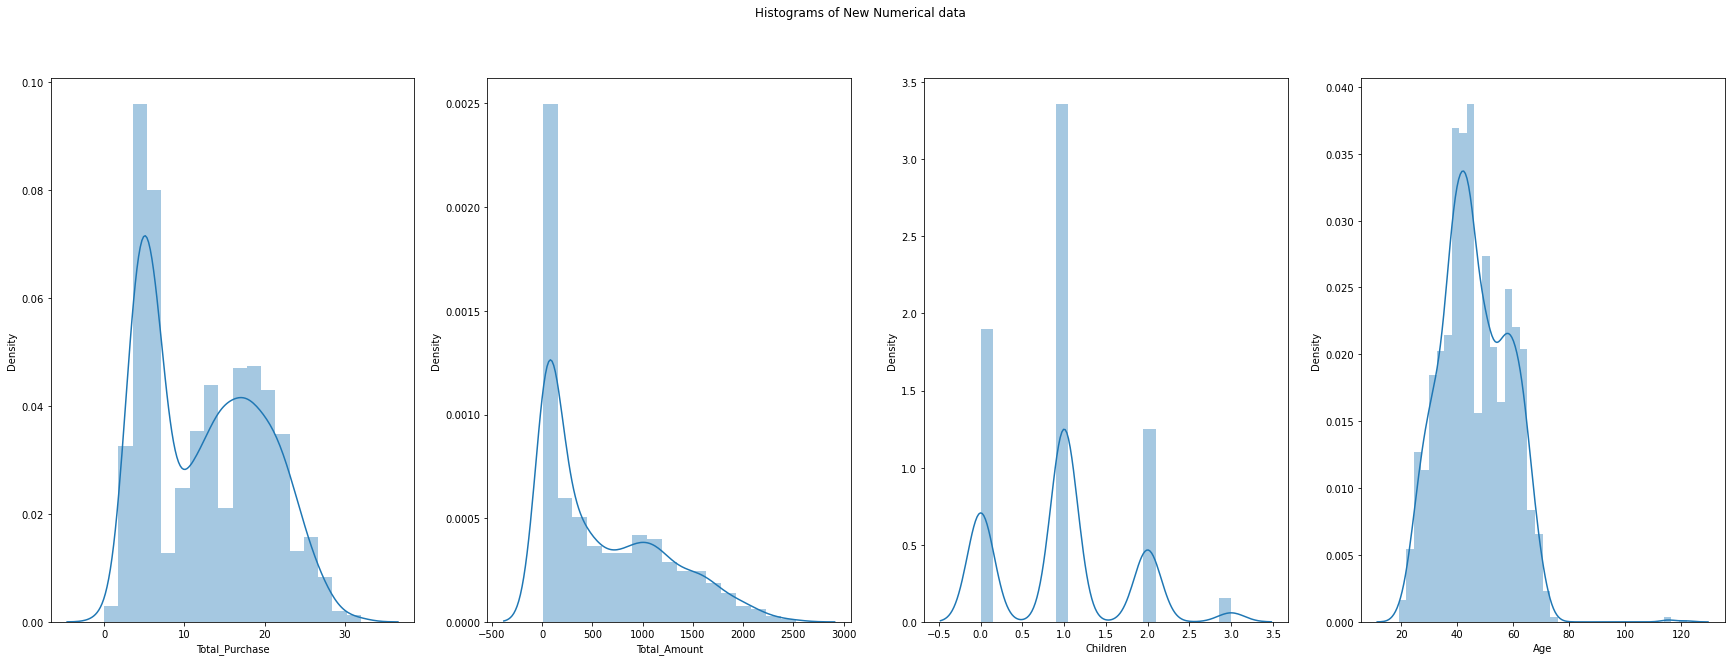

In [ ]:
# Distribution Each Data

fig, axs = plt.subplots(1,4, figsize=(30,10))
plt.suptitle('Histograms of New Numerical data')                                

for i, num in enumerate(newnumerical_cols_fet) :
    sns.distplot(df_fet[num], ax=axs[i%4])
    
plt.show()

**Detail** : Dari Histogram diatas, tidak ada data dengan distribusi normal dikarenakan variasi data yang cukup beragam didalamnya

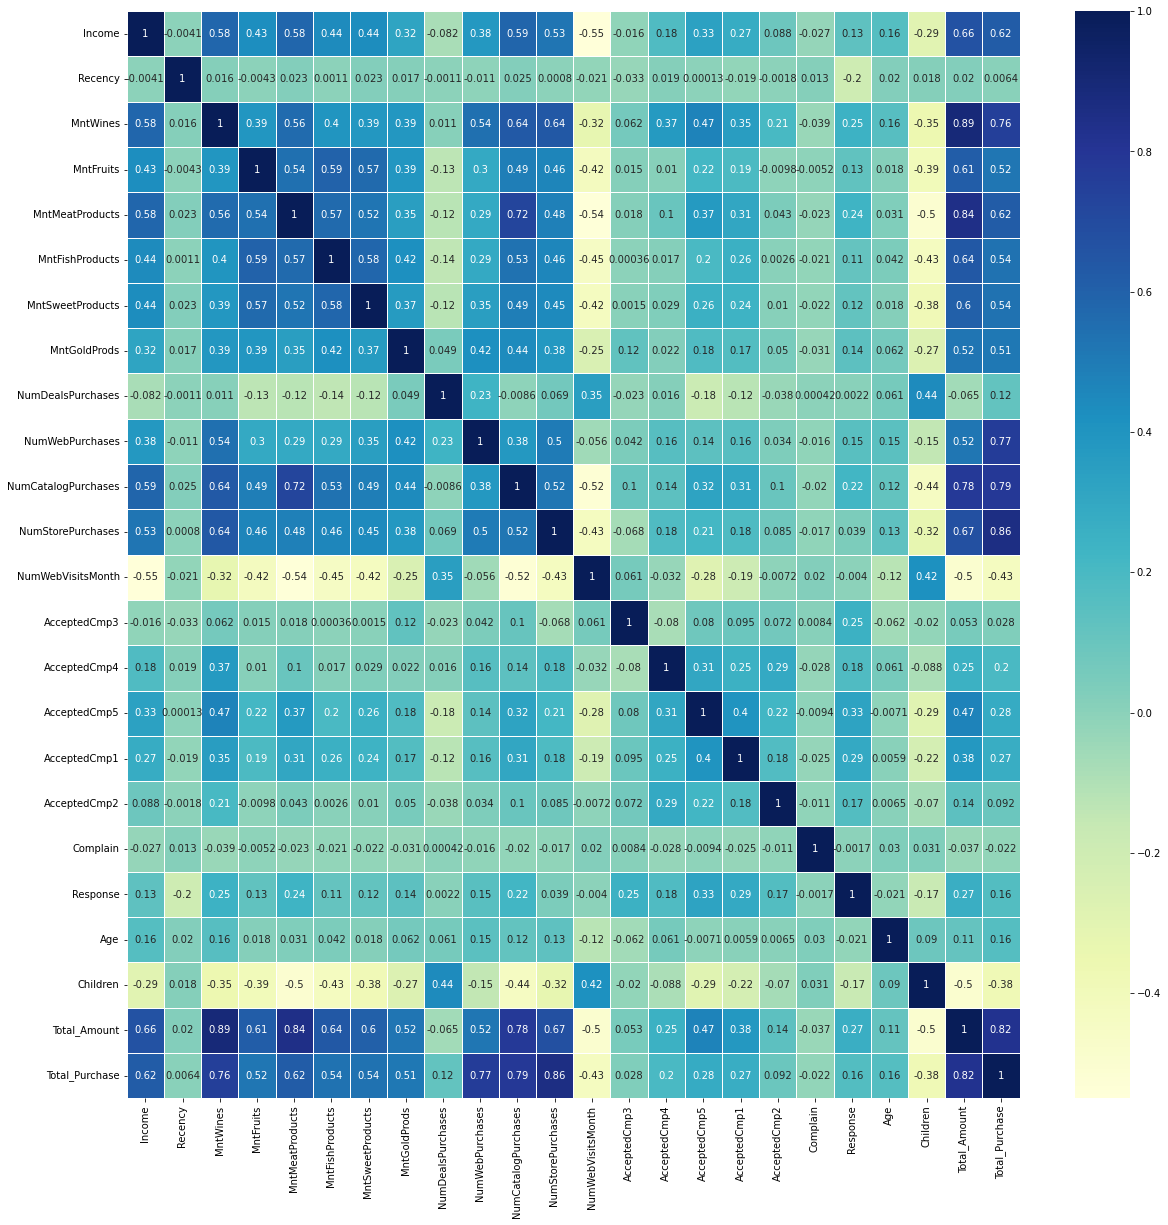

In [ ]:
# Correlation per-Numerical Variable

plt.subplots(figsize=(20, 20))
sns.heatmap(df_fet.corr(), cmap="YlGnBu",annot=True, linewidths=0.5)
plt.show()

**Detail** : Dari table korelasi diatas didapatkan beberapa variable dengan korelasi strong & moderate positif. diantaranya 
Total_Amount-NumCatalogPurchase, Total_Amount-Total_Purchase, Total_Purchase-MntWines

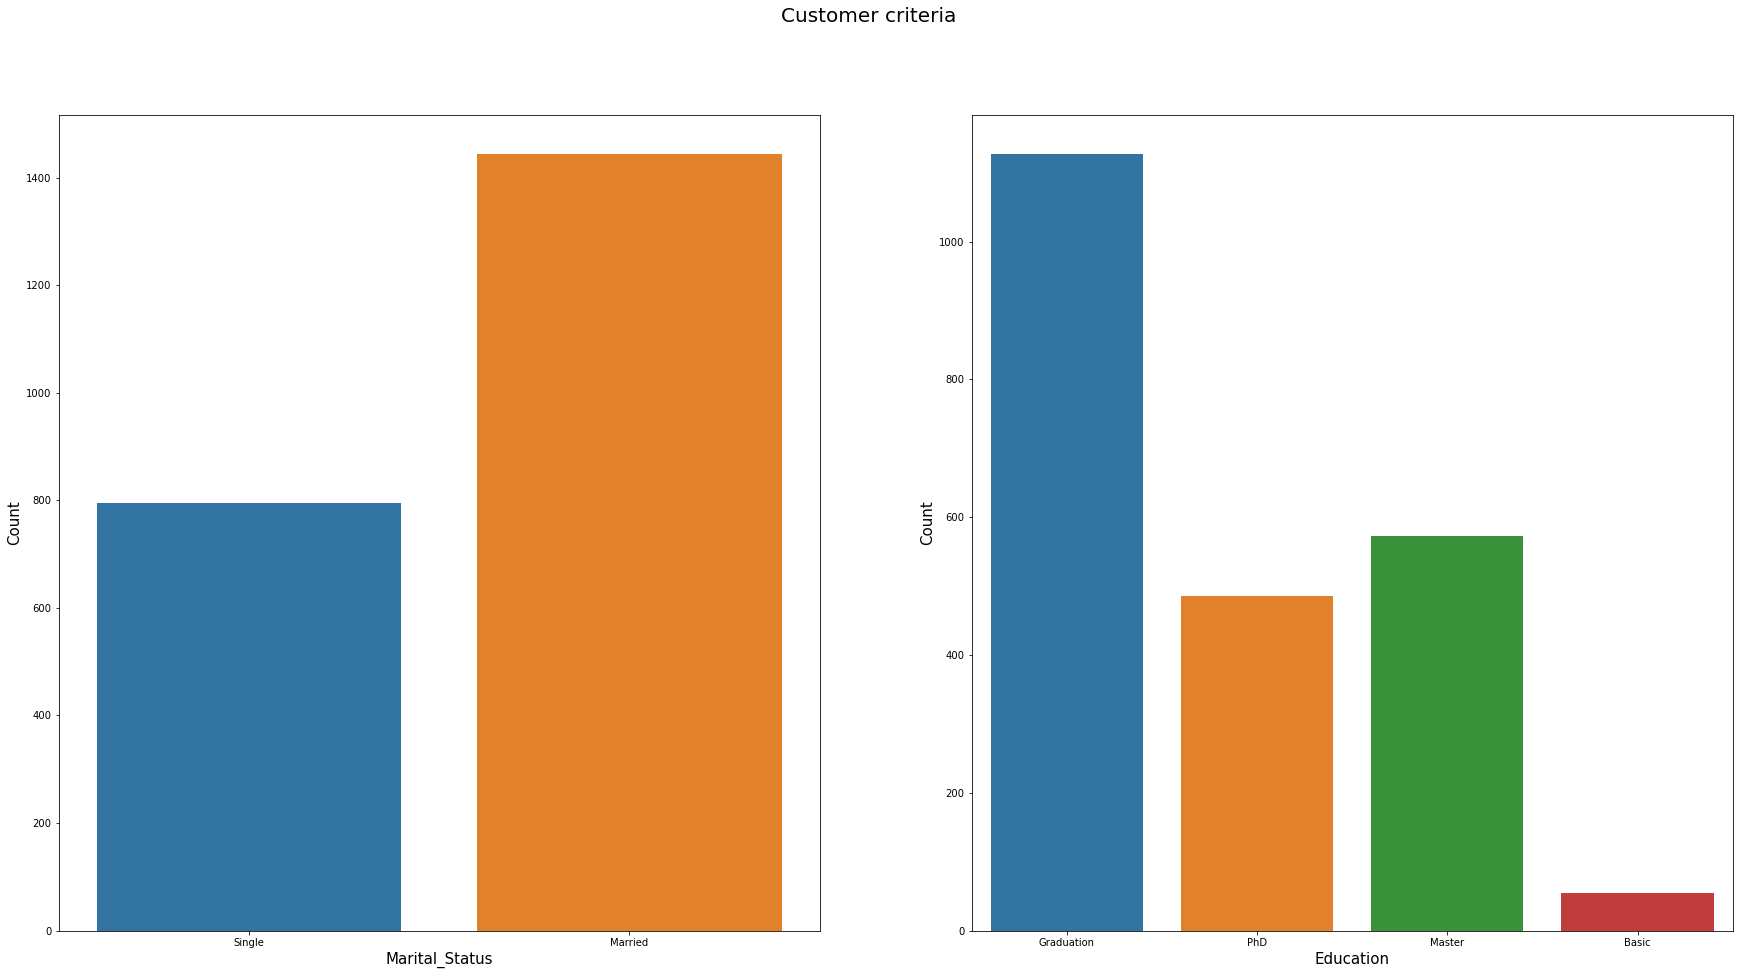

In [ ]:
# Customer criteria

fig, axs = plt.subplots(1,2, figsize=(30,15),)
plt.suptitle('Customer criteria', fontsize=20)

ax1 = sns.countplot(x=df_fet['Marital_Status'], ax=axs[0])
ax2 = sns.countplot(x=df_fet['Education'], ax=axs[1])

ax1.set_xlabel('Marital_Status',fontsize=15)
ax1.set_ylabel('Count',fontsize=15)
ax2.set_xlabel('Education',fontsize=15)
ax2.set_ylabel('Count',fontsize=15)

#for p in ax1.patches:
#    ax1.annotate(f'\n{p.get_height()}', (p.get_x()+0.1, p.get_height()+40), ha='center', va='top', color='white', size=12)
#for q in ax2.patches:
#   ax2.annotate(f'\n{q.get_height()}', (q.get_x()+0.1, q.get_height()+48), ha='center', va='top', color='white', size=12)

plt.show()

Text(0, 0.5, 'Count')

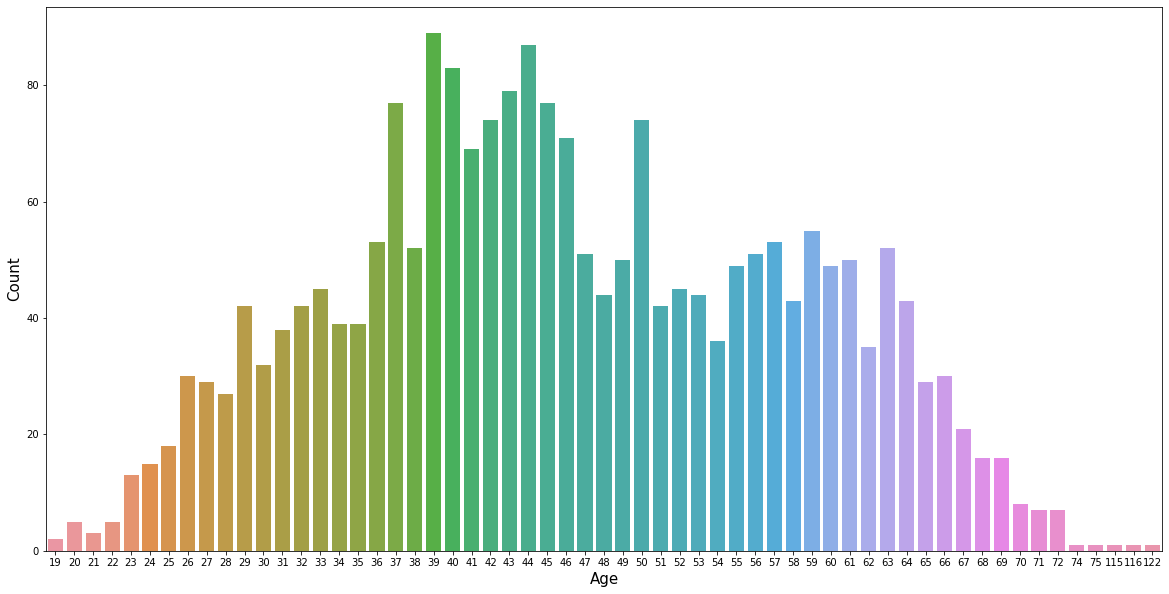

In [ ]:
plt.figure(figsize=(20,10))
ax3 = sns.countplot(x=df_fet['Age'])

ax3.set_xlabel('Age',fontsize=15)
ax3.set_ylabel('Count',fontsize=15)

**Detail** : Dari grafik diatas, didapatkan Customer paling banyak dengan status marital Married dan dengan Education paling banyak Graduation **lalu disusul oleh Master**, dan karyawan dengan umur 39 Tahun (1976) per tahun 2015

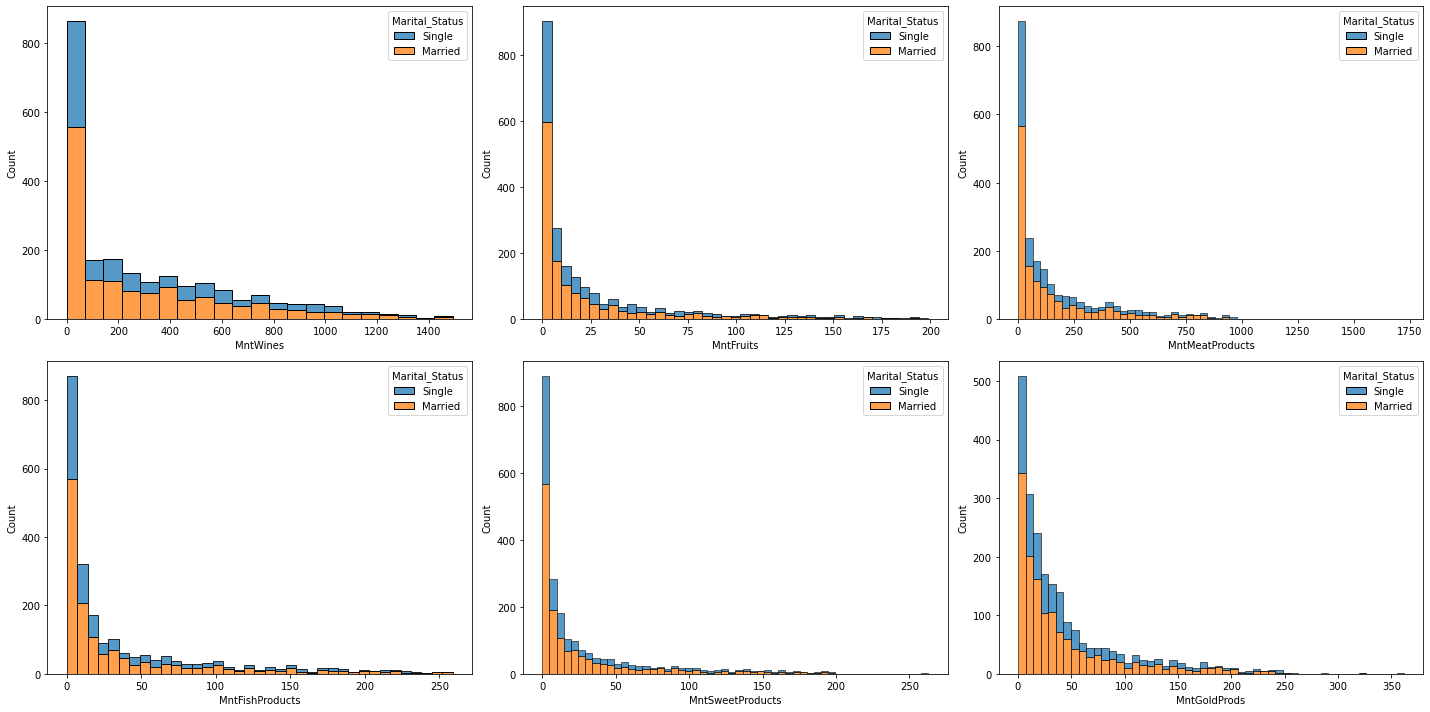

In [ ]:
# Product amount vs Maritas status

Product=['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']

plt.figure(figsize=(20,10))
for i,Name in enumerate(Product):
    plt.subplot(2,3,i+1)
    sns.histplot(data=df_fet,x=Name,color='b',hue='Marital_Status', multiple="stack")
plt.tight_layout()
plt.show()

**Detail** : Dari grafik diatas, didapatkan jumlah produk yang dibeli dalam 2 tahun terakhir. Dari semua produk, Customer dengan marital status Married paling banyak membeli semua produk. Contohnya pada produk wine, dalam 2 tahun customer dominan berbelanja wine dengan total sekitar 0-60 botol.

In [ ]:
# Education vs Income

med2 = df_fet.groupby(['Education'])['Income'].median()
med2

Education
Basic         20744.0
Graduation    51651.0
Master        49681.0
PhD           55005.0
Name: Income, dtype: float64

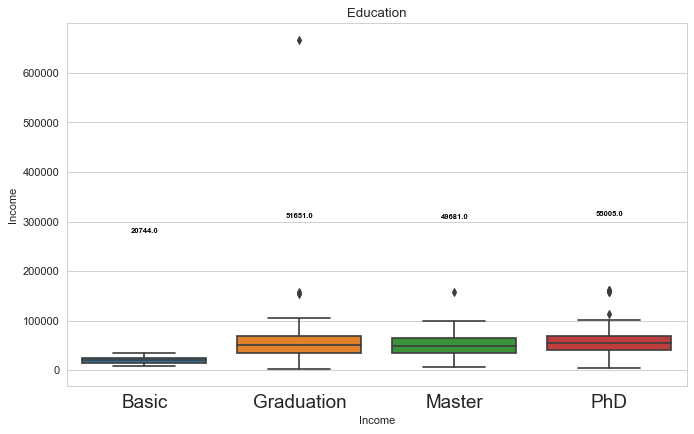

In [ ]:
# Graph Education vs Income

plt.figure(figsize=(10, 6), dpi=80)
sns.set_style("whitegrid")
Graph = sns.boxplot(x="Education", y="Income", data=df_fet, order=['Basic','Graduation','Master','PhD'])

v_offset = df_fet['Income'].median()* 5  # offset from median for display

for xtick in Graph.get_xticks():
    Graph.text(xtick,med2[xtick] + v_offset,med2[xtick], 
            horizontalalignment='center',size='x-small',color='black',weight='semibold')

plt.xlabel("Income")
plt.xticks(size=17)
plt.ylabel("Income")
plt.title("Education")
plt.show()

# Terdapat outlier namun dihiraukan saja
# ... Graduation memiliki variasi data yang banyak, namun PHD yang memiliki rata-rata tertinggi

**Detail** : Graduation memiliki variasi data yang paling banyak, namun PhD tetap yang memiliki median tertinggi disusul oleh Graduation & Master. Hal ini menyebabkan Graduation perlu diteliti lebih dalam untuk hal penawaran karena bisa menjadi salah sasaran (karena banyak variasi income).

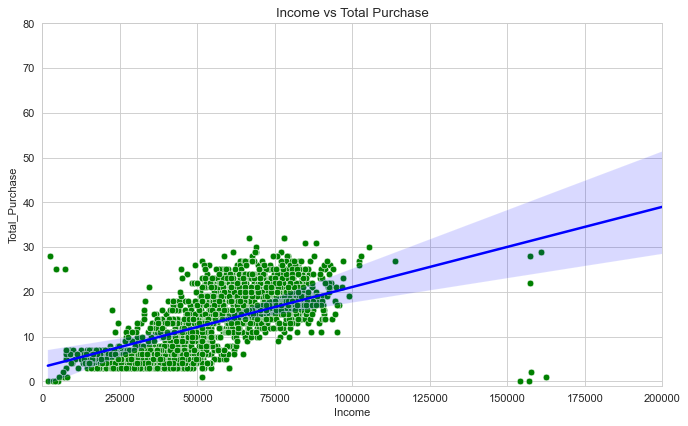

In [ ]:
# Income vs Total Purchase

plt.figure(figsize=(10, 6), dpi=80)
sns.scatterplot(df_fet['Income'], df_fet['Total_Purchase'], data=df_fet, color="green")
sns.regplot(df_fet['Income'], df_fet['Total_Purchase'], data=df_fet, scatter=False, color="blue")
plt.xlim([-1, 200000])                                                                              # Editable, Smaller range because outlier
plt.ylim([-1, 80])                                                                                  # Editable

plt.xlabel("Income")
plt.title("Income vs Total Purchase")

plt.show()

**Detail** : Terlihat dari garis biru bahwa dengan semakin besarnya income, customer cenderung melakukan pembelian yang besar pula (semakin besar gaji, semakin konsumtif). Hal ini merupakan relasi positif namun untuk analisa lebih dalam perlu dilakukan pengecekan tanpa outlier

In [ ]:
# Jumlah Num Purchase
                                                          
Total_no_purchases = df_fet[df_fet['Total_Purchase'] == 0]
Total_purchases = df_fet[df_fet['Total_Purchase'] > 0]

print("customers that Purchase in other reason:", len(Total_no_purchases))
print("customers that purchase:", len(Total_purchases))

customers that Purchase in other reason: 6
customers that purchase: 2234


In [ ]:
# Customer yang tidak melakukan pembayaran

Total_no_purchases

Education Marital_Status    Income  Recency  MntWines  MntFruits  \
655   Graduation         Single  153924.0       81         1          1   
981   Graduation         Single    4861.0       20         2          1   
1245  Graduation         Single    1730.0       65         1          1   
1524  Graduation         Single    3502.0       56         2          1   
1846         PhD        Married    4023.0       29         5          0   
2132         PhD        Married  156924.0       85         2          1   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
655                 1                1                 1             1   
981                 1                1                 0             1   
1245                3                1                 1             1   
1524                1                0                 0             1   
1846                1                1                 1             1   
2132                2                1                 1             1   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
655                   0                0                    0   
981                   0                0                    0   
1245                 15                0                    0   
1524                  0                0                    0   
1846                 15                0                    0   
2132                  0                0                    0   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
655                   0                  0             0             0   
981                   0                 14             0             0   
1245                  0                 20             0             0   
1524                  0                 14             0             0   
1846                  0                 19             0             0   
2132                  0                  0             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  Age  \
655              0             0             0         0         0   40   
981              0             0             0         0         0   50   
1245             0             0             0         0         0   44   
1524             0             0             0         0         0   42   
1846             0             0             0         0         0   52   
2132             0             0             0         0         0   66   

      Children  Total_Amount  Total_Purchase  
655          0             6               0  
981          0             6               0  
1245         0             8               0  
1524         1             5               0  
1846         2             9               0  
2132         0             8               0

**Detail** : ada 4 customer (0.1%) yang tidak pernah membayar produk toko melalui 3 media yang ada (web, store, catalog)

In [ ]:
# Menentukan media yang paling digemari customer (purchased) berdasarkan marital status     

Purchase = ['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']

def user_most_used_channel(Purchases: pd.Series):
    Purchase
    return Purchase[np.argmax(Purchases)]

Total_purchases['Purchase'] = Total_purchases[Purchase].apply(user_most_used_channel, axis=1).copy()
Total_purchases

Education Marital_Status   Income  Recency  MntWines  MntFruits  \
0     Graduation         Single  58138.0       58       635         88   
1     Graduation         Single  46344.0       38        11          1   
2     Graduation        Married  71613.0       26       426         49   
3     Graduation        Married  26646.0       26        11          4   
4            PhD        Married  58293.0       94       173         43   
...          ...            ...      ...      ...       ...        ...   
2235  Graduation        Married  61223.0       46       709         43   
2236         PhD        Married  64014.0       56       406          0   
2237  Graduation         Single  56981.0       91       908         48   
2238      Master        Married  69245.0        8       428         30   
2239         PhD        Married  52869.0       40        84          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0                 546              172                88            88   
1                   6                2                 1             6   
2                 127              111                21            42   
3                  20               10                 3             5   
4                 118               46                27            15   
...               ...              ...               ...           ...   
2235              182               42               118           247   
2236               30                0                 0             8   
2237              217               32                12            24   
2238              214               80                30            61   
2239               61                2                 1            21   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0                     3                8                   10   
1                     2                1                    1   
2                     1                8                    2   
3                     2                2                    0   
4                     5                5                    3   
...                 ...              ...                  ...   
2235                  2                9                    3   
2236                  7                8                    2   
2237                  1                2                    3   
2238                  2                6                    5   
2239                  3                3                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                     4                  7             0             0   
1                     2                  5             0             0   
2                    10                  4             0             0   
3                     4                  6             0             0   
4                     6                  5             0             0   
...                 ...                ...           ...           ...   
2235                  4                  5             0             0   
2236                  5                  7             0             0   
2237                 13                  6             0             1   
2238                 10                  3             0             0   
2239                  4                  7             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  Age  \
0                0             0             0         0         1   58   
1                0             0             0         0         0   61   
2                0             0             0         0         0   50   
3                0             0             0         0         0   31   
4                0             0             0         0         0   34   
...            ...           ...           ...       ...       ...  ...   
2235             0             0  

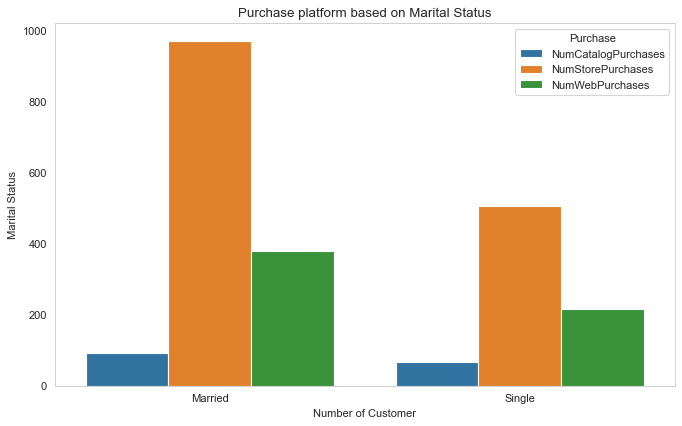

In [ ]:
# Purchase media based on Marital Status                                                                         

plt.figure(figsize=(10, 6), dpi=80)
sns.countplot(
    x="Marital_Status", data=Total_purchases, hue="Purchase",
    order=Total_purchases.Marital_Status.value_counts().index
)
plt.grid(False)
plt.xlabel("Number of Customer")
plt.ylabel("Marital Status")
plt.title("Purchase platform based on Marital Status")
plt.show()

**Detail** : Cutomer dengan status married maupun single sangat tertarik dengan pembelanjaan melalui toko dan kurang tertarik dengan pembelanjaan melalui katalog. Selain itu customer married menjadi kelompok customer yang paling sering melakukan pembelian di seluruh media pada toko jika dibandingkan dengan single.

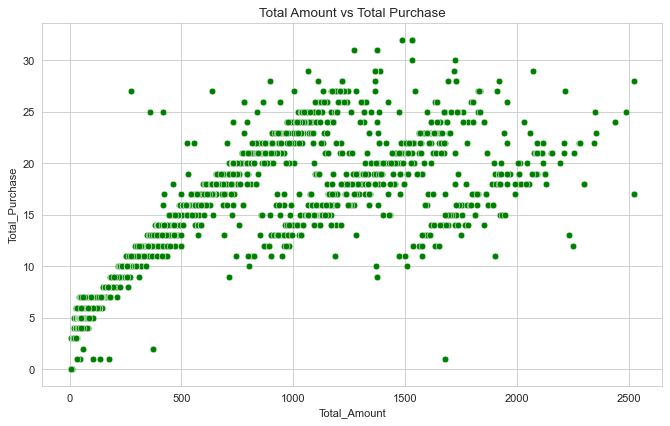

In [ ]:
# Total Amount vs Total Purchase

plt.figure(figsize=(10, 6), dpi=80)
sns.scatterplot(df_fet['Total_Amount'], df_fet['Total_Purchase'], data=df_fet, color="green")

plt.title("Total Amount vs Total Purchase")

plt.show()

**Detail** : Total amount dan total purchase memiliki korelasi positif moderate 

### Encoding & Scaling

In [ ]:
# Label Encoding

le = LabelEncoder()
obj_columns = ["Marital_Status"]                                        
for i in obj_columns:
    df_fet[i] = df_fet[[i]].apply(le.fit_transform)

# Find & Replace Encoding
df_fet["Education"] = df_fet["Education"].replace({"PhD": 3,"Master": 2, "Graduation": 1, "Basic": 0})      # Education encodingnya harus urut karena dapat mempengaruhi hasil, pakai find & replace

df_fet

Education  Marital_Status   Income  Recency  MntWines  MntFruits  \
0             1               1  58138.0       58       635         88   
1             1               1  46344.0       38        11          1   
2             1               0  71613.0       26       426         49   
3             1               0  26646.0       26        11          4   
4             3               0  58293.0       94       173         43   
...         ...             ...      ...      ...       ...        ...   
2235          1               0  61223.0       46       709         43   
2236          3               0  64014.0       56       406          0   
2237          1               1  56981.0       91       908         48   
2238          2               0  69245.0        8       428         30   
2239          3               0  52869.0       40        84          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0                 546              172                88            88   
1                   6                2                 1             6   
2                 127              111                21            42   
3                  20               10                 3             5   
4                 118               46                27            15   
...               ...              ...               ...           ...   
2235              182               42               118           247   
2236               30                0                 0             8   
2237              217               32                12            24   
2238              214               80                30            61   
2239               61                2                 1            21   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0                     3                8                   10   
1                     2                1                    1   
2                     1                8                    2   
3                     2                2                    0   
4                     5                5                    3   
...                 ...              ...                  ...   
2235                  2                9                    3   
2236                  7                8                    2   
2237                  1                2                    3   
2238                  2                6                    5   
2239                  3                3                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                     4                  7             0             0   
1                     2                  5             0             0   
2                    10                  4             0             0   
3                     4                  6             0             0   
4                     6                  5             0             0   
...                 ...                ...           ...           ...   
2235                  4                  5             0             0   
2236                  5                  7             0             0   
2237                 13                  6             0             1   
2238                 10                  3             0             0   
2239                  4                  7             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  Age  \
0                0             0             0         0         1   58   
1                0             0             0         0         0   61   
2                0             0             0         0         0   50   
3                0             0             0         0         0   31   
4                0             0             0         0         0   34   
...            ...           ...           ...       ...       ...  ...   
2235             0             0 

**Detail** : Marital Status tidak memandang urutan, disini kami menggunakan label encoding. Education bersifat ordinal sehingga encodingnya harus urut karena dapat mempengaruhi hasil, oleh karena itu kami menggunakann encoding manual, yaitu find & replace

In [ ]:
# Scaling

In [ ]:
df_fet.describe().T

count          mean           std     min       25%  \
Education            2240.0      1.665625      0.839658     0.0      1.00   
Marital_Status       2240.0      0.355357      0.478728     0.0      0.00   
Income               2240.0  52237.975446  25037.955891  1730.0  35538.75   
Recency              2240.0     49.109375     28.962453     0.0     24.00   
MntWines             2240.0    303.935714    336.597393     0.0     23.75   
MntFruits            2240.0     26.302232     39.773434     0.0      1.00   
MntMeatProducts      2240.0    166.950000    225.715373     0.0     16.00   
MntFishProducts      2240.0     37.525446     54.628979     0.0      3.00   
MntSweetProducts     2240.0     27.062946     41.280498     0.0      1.00   
MntGoldProds         2240.0     44.021875     52.167439     0.0      9.00   
NumDealsPurchases    2240.0      2.325000      1.932238     0.0      1.00   
NumWebPurchases      2240.0      4.084821      2.778714     0.0      2.00   
NumCatalogPurchases  2240.0      2.662054      2.923101     0.0      0.00   
NumStorePurchases    2240.0      5.790179      3.250958     0.0      3.00   
NumWebVisitsMonth    2240.0      5.316518      2.426645     0.0      3.00   
AcceptedCmp3         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp4         2240.0      0.074554      0.262728     0.0      0.00   
AcceptedCmp5         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp1         2240.0      0.064286      0.245316     0.0      0.00   
AcceptedCmp2         2240.0      0.013393      0.114976     0.0      0.00   
Complain             2240.0      0.009375      0.096391     0.0      0.00   
Response             2240.0      0.149107      0.356274     0.0      0.00   
Age                  2240.0     46.194196     11.984069    19.0     38.00   
Children             2240.0      0.950446      0.751803     0.0      0.00   
Total_Amount         2240.0    605.798214    602.249288     5.0     68.75   
Total_Purchase       2240.0     12.537054      7.205741     0.0      6.00   

                         50%       75%       max  
Education                1.0      2.00       3.0  
Marital_Status           0.0      1.00       1.0  
Income               51381.5  68289.75  666666.0  
Recency                 49.0     74.00      99.0  
MntWines               173.5    504.25    1493.0  
MntFruits                8.0     33.00     199.0  
MntMeatProducts         67.0    232.00    1725.0  
MntFishProducts         12.0     50.00     259.0  
MntSweetProducts         8.0     33.00     263.0  
MntGoldProds            24.0     56.00     362.0  
NumDealsPurchases        2.0      3.00      15.0  
NumWebPurchases          4.0      6.00      27.0  
NumCatalogPurchases      2.0      4.00      28.0  
NumStorePurchases        5.0      8.00      13.0  
NumWebVisitsMonth        6.0      7.00      20.0  
AcceptedCmp3             0.0      0.00       1.0  
AcceptedCmp4             0.0      0.00       1.0  
AcceptedCmp5             0.0      0.00       1.0  
AcceptedCmp1             0.0      0.00       1.0  
AcceptedCmp2             0.0      0.00       1.0  
Complain                 0.0      0.00       1.0  
Response                 0.0      0.00       1.0  
Age                     45.0     56.00     122.0  
Children                 1.0      1.00       3.0  
Total_Amount           396.0   1045.50    2525.0  
Total_Purchase          12.0     18.00      32.0

**Detail** : Dari tabel deskripsi diatas, dapat disimpulkan ada beberapa kolom yang perlu discaling (Non Binary) dan tidak perlu discaling (Binary). sehingga kami kelompokan menjadi berikut :

In [ ]:
df_fet.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Children',
       'Total_Amount', 'Total_Purchase'],
      dtype='object')

In [ ]:
scaling = ['Income', 
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Age', 'Total_Amount',
       'Total_Purchase']
non_scaling = ['Education', 'Marital_Status', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Children']

In [ ]:
df_fet[non_scaling]

Education  Marital_Status  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0             1               1             0             0             0   
1             1               1             0             0             0   
2             1               0             0             0             0   
3             1               0             0             0             0   
4             3               0             0             0             0   
...         ...             ...           ...           ...           ...   
2235          1               0             0             0             0   
2236          3               0             0             0             0   
2237          1               1             0             1             0   
2238          2               0             0             0             0   
2239          3               0             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Response  Children  
0                0             0         0         1         0  
1                0             0         0         0         2  
2                0             0         0         0         0  
3                0             0         0         0         1  
4                0             0         0         0         1  
...            ...           ...       ...       ...       ...  
2235             0             0         0         0         1  
2236             1             0         0         0         3  
2237             0             0         0         0         0  
2238             0             0         0         0         1  
2239             0             0         0         1         2  

[2240 rows x 10 columns]

In [ ]:
scaler = preprocessing.MinMaxScaler()

# fit on data column
df_scale = scaler.fit_transform(df_fet[scaling])
df_scale = pd.DataFrame(df_scale, columns = scaling)
df_scale

Income   Recency  MntWines  MntFruits  MntMeatProducts  \
0     0.084832  0.585859  0.425318   0.442211         0.316522   
1     0.067095  0.383838  0.007368   0.005025         0.003478   
2     0.105097  0.262626  0.285332   0.246231         0.073623   
3     0.037471  0.262626  0.007368   0.020101         0.011594   
4     0.085065  0.949495  0.115874   0.216080         0.068406   
...        ...       ...       ...        ...              ...   
2235  0.089472  0.464646  0.474883   0.216080         0.105507   
2236  0.093669  0.565657  0.271936   0.000000         0.017391   
2237  0.083092  0.919192  0.608171   0.241206         0.125797   
2238  0.101536  0.080808  0.286671   0.150754         0.124058   
2239  0.076908  0.404040  0.056263   0.015075         0.035362   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0            0.664093          0.334601      0.243094           0.200000   
1            0.007722          0.003802      0.016575           0.133333   
2            0.428571          0.079848      0.116022           0.066667   
3            0.038610          0.011407      0.013812           0.133333   
4            0.177606          0.102662      0.041436           0.333333   
...               ...               ...           ...                ...   
2235         0.162162          0.448669      0.682320           0.133333   
2236         0.000000          0.000000      0.022099           0.466667   
2237         0.123552          0.045627      0.066298           0.066667   
2238         0.308880          0.114068      0.168508           0.133333   
2239         0.007722          0.003802      0.058011           0.200000   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0            0.296296             0.357143           0.307692   
1            0.037037             0.035714           0.153846   
2            0.296296             0.071429           0.769231   
3            0.074074             0.000000           0.307692   
4            0.185185             0.107143           0.461538   
...               ...                  ...                ...   
2235         0.333333             0.107143           0.307692   
2236         0.296296             0.071429           0.384615   
2237         0.074074             0.107143           1.000000   
2238         0.222222             0.178571           0.769231   
2239         0.111111             0.035714           0.307692   

      NumWebVisitsMonth       Age  Total_Amount  Total_Purchase  
0                  0.35  0.378641      0.639683         0.68750  
1                  0.25  0.407767      0.008730         0.12500  
2                  0.20  0.300971      0.305952         0.62500  
3                  0.30  0.116505      0.019048         0.18750  
4                  0.25  0.145631      0.165476         0.43750  
...                 ...       ...           ...             ...  
2235               0.25  0.281553      0.530159         0.50000  
2236               0.35  0.485437      0.174206         0.46875  
2237               0.30  0.145631      0.490476         0.56250  
2238               0.15  0.388350      0.332540         0.65625  
2239               0.35  0.407767      0.066270         0.25000  

[2240 rows x 16 columns]

**Detail** : MinMax Scaler dilakukan untuk data yang distribusinya tidak normal. Scaling dilakukan dengan MinMax Scaler dikarenakan secara teori tidak ada metode scaling terbaik untuk data tertentu.

In [ ]:
# Concat data

df_fix = pd.concat([df_fet[non_scaling],df_scale], axis = 1)
df_fix

Education  Marital_Status  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0             1               1             0             0             0   
1             1               1             0             0             0   
2             1               0             0             0             0   
3             1               0             0             0             0   
4             3               0             0             0             0   
...         ...             ...           ...           ...           ...   
2235          1               0             0             0             0   
2236          3               0             0             0             0   
2237          1               1             0             1             0   
2238          2               0             0             0             0   
2239          3               0             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Response  Children    Income  \
0                0             0         0         1         0  0.084832   
1                0             0         0         0         2  0.067095   
2                0             0         0         0         0  0.105097   
3                0             0         0         0         1  0.037471   
4                0             0         0         0         1  0.085065   
...            ...           ...       ...       ...       ...       ...   
2235             0             0         0         0         1  0.089472   
2236             1             0         0         0         3  0.093669   
2237             0             0         0         0         0  0.083092   
2238             0             0         0         0         1  0.101536   
2239             0             0         0         1         2  0.076908   

       Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0     0.585859  0.425318   0.442211         0.316522         0.664093   
1     0.383838  0.007368   0.005025         0.003478         0.007722   
2     0.262626  0.285332   0.246231         0.073623         0.428571   
3     0.262626  0.007368   0.020101         0.011594         0.038610   
4     0.949495  0.115874   0.216080         0.068406         0.177606   
...        ...       ...        ...              ...              ...   
2235  0.464646  0.474883   0.216080         0.105507         0.162162   
2236  0.565657  0.271936   0.000000         0.017391         0.000000   
2237  0.919192  0.608171   0.241206         0.125797         0.123552   
2238  0.080808  0.286671   0.150754         0.124058         0.308880   
2239  0.404040  0.056263   0.015075         0.035362         0.007722   

      MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0             0.334601      0.243094           0.200000         0.296296   
1             0.003802      0.016575           0.133333         0.037037   
2             0.079848      0.116022           0.066667         0.296296   
3             0.011407      0.013812           0.133333         0.074074   
4             0.102662      0.041436           0.333333         0.185185   
...                ...           ...                ...              ...   
2235          0.448669      0.682320           0.133333         0.333333   
2236          0.000000      0.022099           0.466667         0.296296   
2237          0.045627      0.066298           0.066667         0.074074   
2238          0.114068      0.168508           0.133333         0.222222   
2239          0.003802      0.058011           0.200000         0.111111   

      NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth       Age  \
0                0.357143           0.307692               0.35  0.378641   
1                0.035714           0.153846               0.25  0.407767   
2                0.071429           0.769231               0.20  0.300971   
3                0.000000           0.307692               0.30  0.116

**Detail** : Data yang digunakan untuk modeling adalah data_fix

### Import Data Hasil Scaling

In [ ]:
# Import Library

import pandas as pd
pd.set_option('display.max_columns', 50)

import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering as AC

from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [ ]:
# Import Data

df = pd.read_csv('/Users/mcbookair/Desktop/Final Project Bootcamp/Cahya-scaling.csv') # Min-max scaller
df

Education  Marital_Status  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0             1               1             0             0             0   
1             1               1             0             0             0   
2             1               0             0             0             0   
3             1               0             0             0             0   
4             3               0             0             0             0   
...         ...             ...           ...           ...           ...   
2235          1               0             0             0             0   
2236          3               0             0             0             0   
2237          1               1             0             1             0   
2238          2               0             0             0             0   
2239          3               0             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Response  Children    Income  \
0                0             0         0         1         0  0.084832   
1                0             0         0         0         2  0.067095   
2                0             0         0         0         0  0.105097   
3                0             0         0         0         1  0.037471   
4                0             0         0         0         1  0.085065   
...            ...           ...       ...       ...       ...       ...   
2235             0             0         0         0         1  0.089472   
2236             1             0         0         0         3  0.093669   
2237             0             0         0         0         0  0.083092   
2238             0             0         0         0         1  0.101536   
2239             0             0         0         1         2  0.076908   

       Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0     0.585859  0.425318   0.442211         0.316522         0.664093   
1     0.383838  0.007368   0.005025         0.003478         0.007722   
2     0.262626  0.285332   0.246231         0.073623         0.428571   
3     0.262626  0.007368   0.020101         0.011594         0.038610   
4     0.949495  0.115874   0.216080         0.068406         0.177606   
...        ...       ...        ...              ...              ...   
2235  0.464646  0.474883   0.216080         0.105507         0.162162   
2236  0.565657  0.271936   0.000000         0.017391         0.000000   
2237  0.919192  0.608171   0.241206         0.125797         0.123552   
2238  0.080808  0.286671   0.150754         0.124058         0.308880   
2239  0.404040  0.056263   0.015075         0.035362         0.007722   

      MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0             0.334601      0.243094           0.200000         0.296296   
1             0.003802      0.016575           0.133333         0.037037   
2             0.079848      0.116022           0.066667         0.296296   
3             0.011407      0.013812           0.133333         0.074074   
4             0.102662      0.041436           0.333333         0.185185   
...                ...           ...                ...              ...   
2235          0.448669      0.682320           0.133333         0.333333   
2236          0.000000      0.022099           0.466667         0.296296   
2237          0.045627      0.066298           0.066667         0.074074   
2238          0.114068      0.168508           0.133333         0.222222   
2239          0.003802      0.058011           0.200000         0.111111   

      NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth       Age  \
0                0.357143           0.307692               0.35  0.378641   
1                0.035714           0.153846               0.25  0.407767   
2                0.071429           0.769231               0.20  0.300971   
3                0.000000           0.307692               0.30  0.116

In [ ]:
df.shape

(2240, 26)

<Figure size 864x576 with 0 Axes>

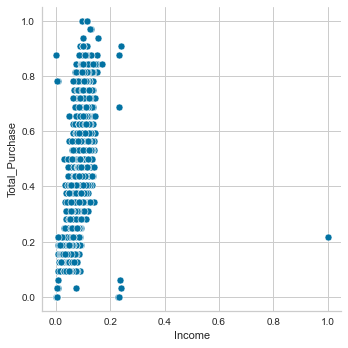

In [ ]:
# Plot data before clustering

plt.figure(figsize=(12,8))
sns.relplot(x='Income',y='Total_Purchase',data=df,palette='tab10')              # memvisualisasikan hubungan statistik menggunakan dua pendekatan umum: plot scatter dan plot garis

### PCA

In [ ]:
# Define n variable reduction

def variance_score(no_comp):                                                    
    pca = PCA(n_components = no_comp)
    pca.fit(df)
    
    variance = pca.explained_variance_ratio_.sum() * 100
    print("Explained Variance Ratio for `{}` = {}%".format(no_comp, variance))
    
components = range(1,26)                                                         # Component = dimension
for i in components:
    variance_score(i)                                                                           

Explained Variance Ratio for `1` = 29.459560862312586%
Explained Variance Ratio for `2` = 57.17332539226682%
Explained Variance Ratio for `3` = 66.79152706165583%
Explained Variance Ratio for `4` = 74.74623069641069%
Explained Variance Ratio for `5` = 80.36513434098845%
Explained Variance Ratio for `6` = 83.937247315299%
Explained Variance Ratio for `7` = 87.06408256793151%
Explained Variance Ratio for `8` = 89.26675245393615%
Explained Variance Ratio for `9` = 91.35368574614722%
Explained Variance Ratio for `10` = 92.9425710898877%
Explained Variance Ratio for `11` = 94.25558556012939%
Explained Variance Ratio for `12` = 95.12131312464636%
Explained Variance Ratio for `13` = 95.8105616476776%
Explained Variance Ratio for `14` = 96.47098038902776%
Explained Variance Ratio for `15` = 97.02698866531637%
Explained Variance Ratio for `16` = 97.54618967856388%
Explained Variance Ratio for `17` = 98.02992827787442%
Explained Variance Ratio for `18` = 98.49088755732076%
Explained Variance Rat

In [ ]:
pca=PCA()
pca.fit(df)

PCA()

[]

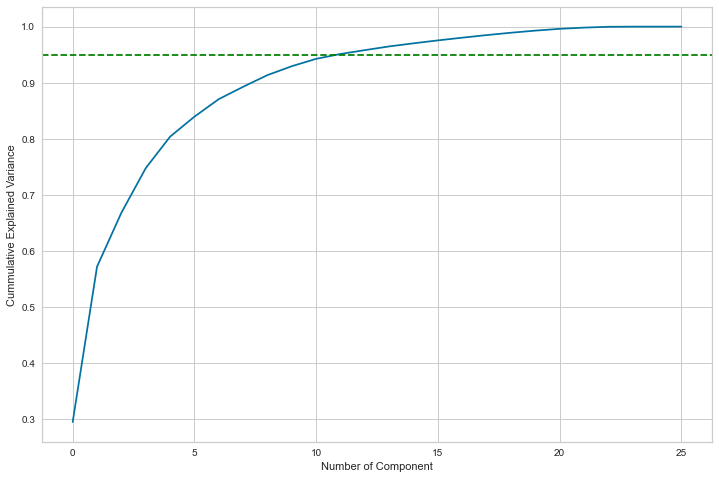

In [ ]:
# Plot variance with 95%

plt.figure(figsize=(12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Component')
plt.ylabel('Cummulative Explained Variance')
plt.axhline(y=0.95, linestyle='--', color='green')                              # variance to be between 95–99%
plt.plot()                                                                      # Sumber : https://www.mikulskibartosz.name/pca-how-to-choose-the-number-of-components/

**Detail** : Variable reduction is 12, n_component = 12

In [ ]:
# Fitting PCA

pca_final = PCA(n_components = 12, random_state=42)
df_pca = pca_final.fit_transform(df)
df_pca = pd.DataFrame(df_pca)
df_pca

0         1         2         3         4         5         6   \
0    -1.045429 -0.944165  0.745007  0.281666  0.195865 -0.201738  0.295645   
1    -0.204632  1.324616  0.677443 -0.033203 -0.047611 -0.015479 -0.135507   
2    -0.977929 -0.650462 -0.446312 -0.150142 -0.152790 -0.339733 -0.145887   
3    -0.546301  0.513730 -0.356576 -0.322670  0.211170 -0.112467 -0.187174   
4     1.262197 -0.358782 -0.406917 -0.179089 -0.264606  0.213665  0.278634   
...        ...       ...       ...       ...       ...       ...       ...   
2235 -0.650014  0.146596 -0.371776  0.329850 -0.211571 -0.178115  0.071783   
2236  1.963962  1.209512 -0.259447  0.939609 -0.104194  0.163155  0.008754   
2237 -0.990307 -0.793534  0.520811  0.082560 -0.523273  0.652495 -0.377982   
2238  0.302062 -0.202017 -0.391382  0.237177 -0.193472 -0.492599 -0.215324   
2239  1.660245  0.458727 -0.101068  0.351869  0.708306 -0.105824  0.108816   

            7         8         9         10        11  
0    -0.598952 -0.101336  0.055021  0.253822 -0.352725  
1     0.073969  0.184915 -0.042745  0.057618 -0.058679  
2     0.004122 -0.131479  0.028217 -0.075669  0.111794  
3     0.041146  0.036247 -0.014539 -0.034597  0.045687  
4    -0.197553  0.000218  0.049378  0.045458  0.108939  
...        ...       ...       ...       ...       ...  
2235 -0.027761  0.004770 -0.051957  0.089937 -0.417817  
2236  0.143317  0.574515  0.641018 -0.380544 -0.084632  
2237  0.131201 -0.702547  0.128974  0.101623  0.161600  
2238  0.063777 -0.033955 -0.004407 -0.059635  0.067929  
2239 -0.532022 -0.029919  0.001466  0.002268  0.063210  

[2240 rows x 12 columns]

In [ ]:
# Rename column

df_pca = df_pca.rename(columns={0: 'PCA_1',1: 'PCA_2',
                                2: 'PCA_3',3: 'PCA_4',
                                4: 'PCA_5',5: 'PCA_6',
                                6: 'PCA_7',7: 'PCA_8',
                                8: 'PCA_9',9: 'PCA_10',
                                10: 'PCA_11',11: 'PCA_12'})
df_pca

PCA_1     PCA_2     PCA_3     PCA_4     PCA_5     PCA_6     PCA_7  \
0    -1.045429 -0.944165  0.745007  0.281666  0.195865 -0.201738  0.295645   
1    -0.204632  1.324616  0.677443 -0.033203 -0.047611 -0.015479 -0.135507   
2    -0.977929 -0.650462 -0.446312 -0.150142 -0.152790 -0.339733 -0.145887   
3    -0.546301  0.513730 -0.356576 -0.322670  0.211170 -0.112467 -0.187174   
4     1.262197 -0.358782 -0.406917 -0.179089 -0.264606  0.213665  0.278634   
...        ...       ...       ...       ...       ...       ...       ...   
2235 -0.650014  0.146596 -0.371776  0.329850 -0.211571 -0.178115  0.071783   
2236  1.963962  1.209512 -0.259447  0.939609 -0.104194  0.163155  0.008754   
2237 -0.990307 -0.793534  0.520811  0.082560 -0.523273  0.652495 -0.377982   
2238  0.302062 -0.202017 -0.391382  0.237177 -0.193472 -0.492599 -0.215324   
2239  1.660245  0.458727 -0.101068  0.351869  0.708306 -0.105824  0.108816   

         PCA_8     PCA_9    PCA_10    PCA_11    PCA_12  
0    -0.598952 -0.101336  0.055021  0.253822 -0.352725  
1     0.073969  0.184915 -0.042745  0.057618 -0.058679  
2     0.004122 -0.131479  0.028217 -0.075669  0.111794  
3     0.041146  0.036247 -0.014539 -0.034597  0.045687  
4    -0.197553  0.000218  0.049378  0.045458  0.108939  
...        ...       ...       ...       ...       ...  
2235 -0.027761  0.004770 -0.051957  0.089937 -0.417817  
2236  0.143317  0.574515  0.641018 -0.380544 -0.084632  
2237  0.131201 -0.702547  0.128974  0.101623  0.161600  
2238  0.063777 -0.033955 -0.004407 -0.059635  0.067929  
2239 -0.532022 -0.029919  0.001466  0.002268  0.063210  

[2240 rows x 12 columns]

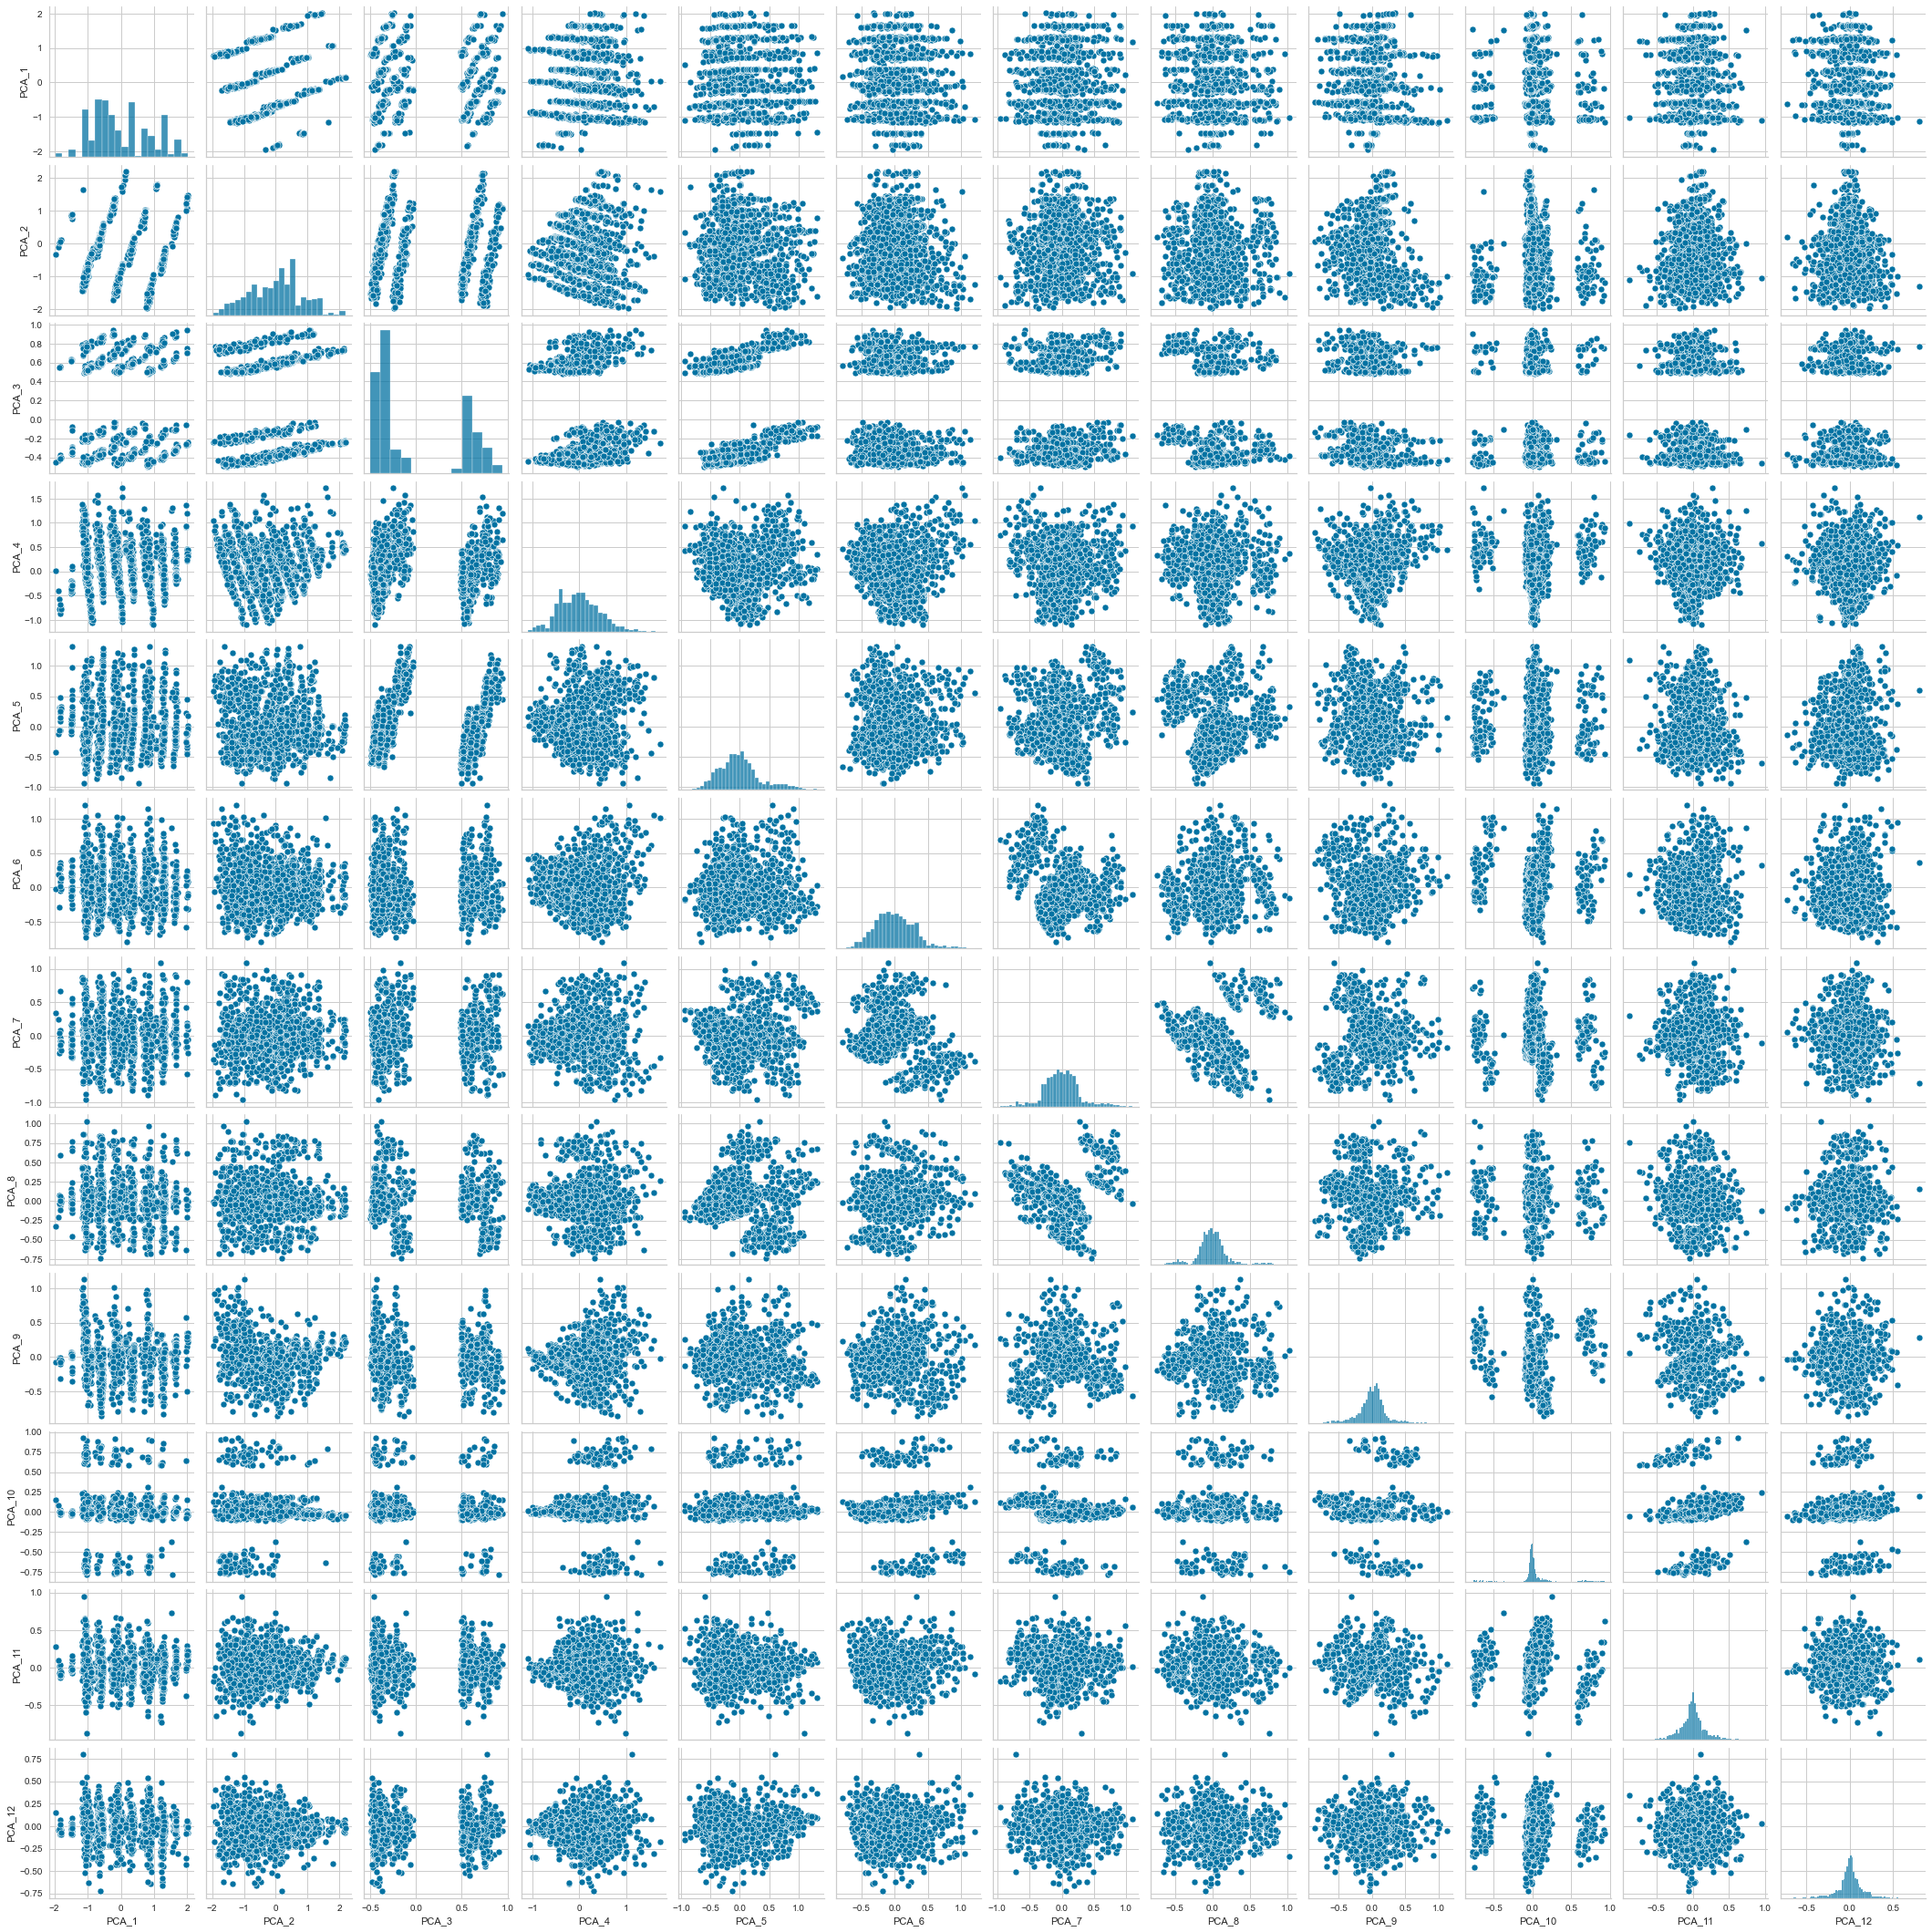

In [ ]:
# Plot data after PCA

sns.pairplot(df_pca, palette='tab10')